# **Time Series Handson**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data= pd.read_csv('AirPassengers.csv')

In [ ]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
data["Month"]= pd.to_datetime(data["Month"])

In [ ]:
data #YYYY-MM-DD

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:
data.isnull().sum()

,0
Month,0
#Passengers,0


In [ ]:
data

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [ ]:
data.set_index("Month",inplace=True)

In [ ]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

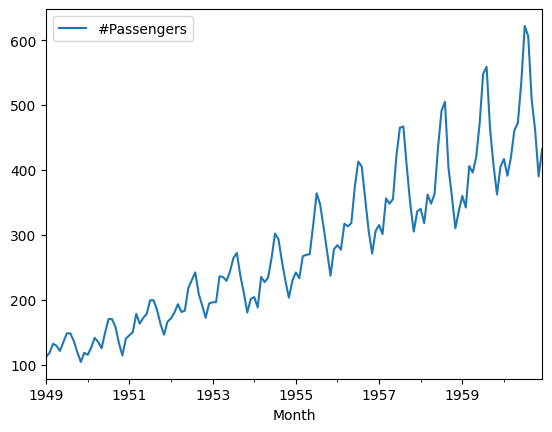

In [ ]:
data.plot()

Figure(640x480)


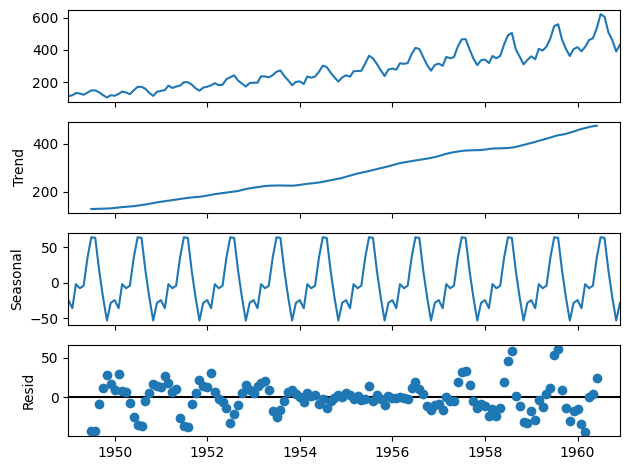

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed= seasonal_decompose(data)
print(decomposed.plot())


In [ ]:
# Checking the stationarity of the data
from statsmodels.tsa.stattools import adfuller   #Augumented -Dickey Fuller Test
test_result= adfuller(data)
test_result

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [ ]:
pval=test_result[1]
pval

0.991880243437641

In [ ]:
# null hypothesis: data is not stationary
# alternate hypothesis: data is stationary

In [ ]:
if pval<0.05:
  print("Data is stationary")
else:
  print("Data is not stationary")

Data is not stationary


In [ ]:
data.head(10)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

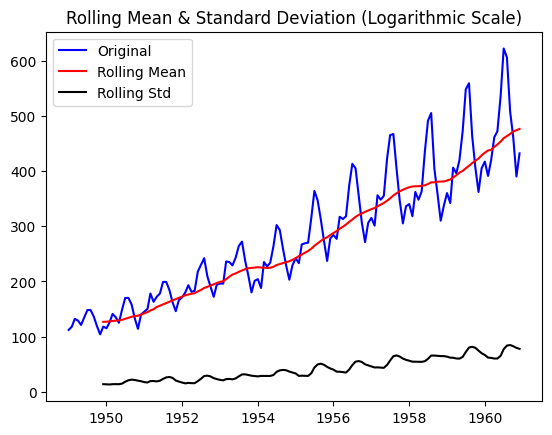

In [ ]:
# Convert the data to stationary
mean_log = data.rolling(window=12).mean()
std_log = data.rolling(window=12).std()

plt.plot(data, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

In [ ]:
mean_log.head(20)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


<Axes: xlabel='Month'>

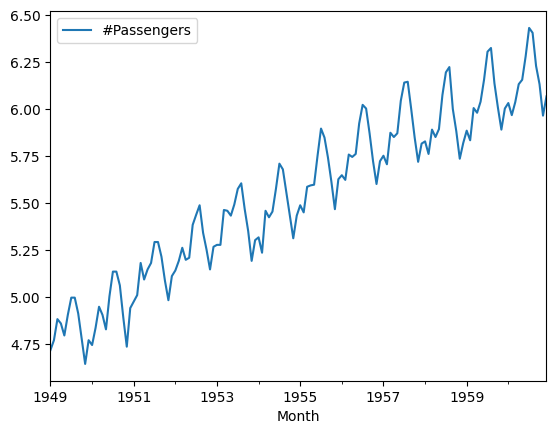

In [ ]:
#logrithmic comutation to make the time series stationary
first_log = np.log(data)
first_log = first_log.dropna()
first_log.plot()

In [ ]:
first_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

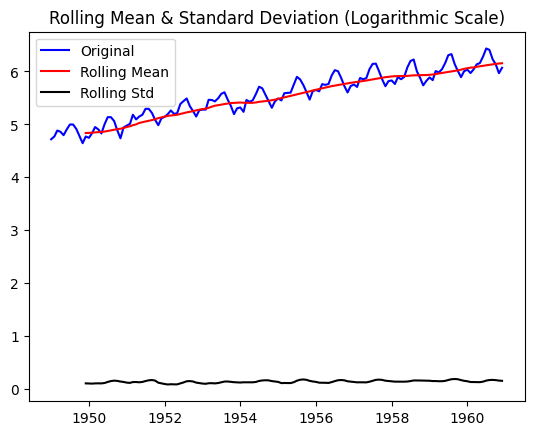

In [ ]:
mean_log = first_log.rolling(window=12).mean()
std_log = first_log.rolling(window=12).std()

plt.plot(first_log, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

In [ ]:
new_data = first_log - mean_log
new_data = new_data.dropna()
new_data.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

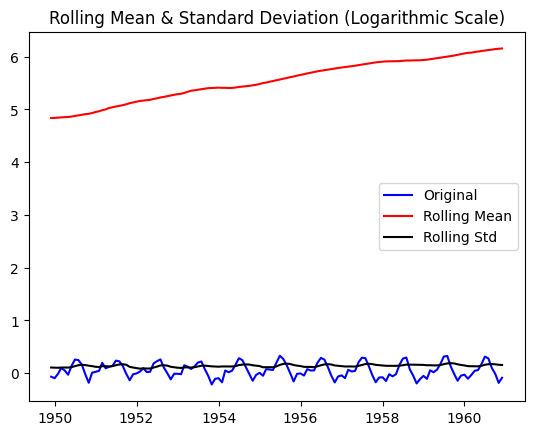

In [ ]:
# mean_log = new_data.rolling(window=12).mean()
# std_log = new_data.rolling(window=12).std()

plt.plot(new_data, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

In [ ]:
result=adfuller(new_data)

In [ ]:
p_value= result[1]
p_value

0.022234630001242206

In [ ]:
if p_value<0.05:
  print("Data is stationary,Null hypothesis Rejected")
else:
  print("Data is not stationary")

Data is stationary,Null hypothesis Rejected


# Model building

In [ ]:
# splitting data into train and test

new_data

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [ ]:
train= new_data.iloc[:120]["#Passengers"]
test= new_data.iloc[120:]["#Passengers"]

In [ ]:
train

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1959-07-01,0.316430
1959-08-01,0.327838
1959-09-01,0.128057


In [ ]:
test.shape

(13,)

In [ ]:
# Implementation of ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# # ARIMA -AutoRegressive Integrated Moving Average
# ARIMA - (p,d,q)

# p - order of lag   ,  p= ?
# d - degree of differencing  d=1
# q - order of moving average q= ?

In [ ]:
A_model=ARIMA(train,order=(6,1,6))  #randomly picking up the values of p and q , now i'm replacing with optimal value 6,1,6

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
A_model=A_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
new_data["ARIMA_prediction"]=A_model.predict(start=len(train),end=len(train)+len(test)-1)

In [ ]:
new_data.tail(20)

,#Passengers,ARIMA_prediction
Month,,
1959-05-01,0.066365,NaN
1959-06-01,0.176286,NaN
1959-07-01,0.316430,NaN
1959-08-01,0.327838,NaN
1959-09-01,0.128057,NaN
1959-10-01,-0.011315,NaN
1959-11-01,-0.141406,NaN
1959-12-01,-0.044481,-0.127807
1960-01-01,-0.027530,-0.078208


<Axes: xlabel='Month'>

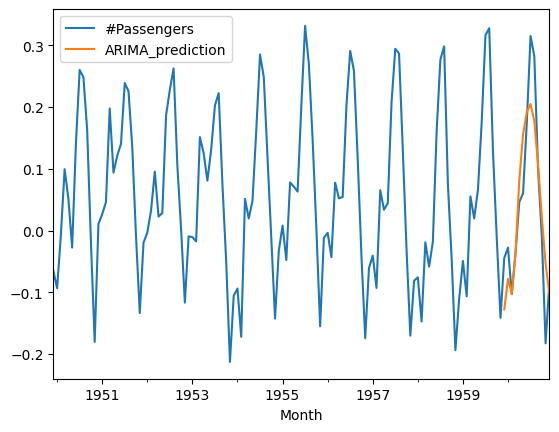

In [ ]:
new_data[["#Passengers","ARIMA_prediction"]].plot()

In [ ]:
from sklearn.metrics import *

In [ ]:
#finding optimal values of p,d,q with itertools
import itertools
p=range(0,7)
d=range(1,2)
q=range(0,7)
pdq=list(itertools.product(p,d,q))
rmse = []
order1 =[]
for i in pdq:
    model = ARIMA(train, order = i)
    model_fit = model.fit()
    pred = model_fit.predict(start = len(train), end= len(train)+len(test)-1)
    error = np.sqrt(mean_squared_error(test,pred))
    order1.append(i)
    rmse.append(error)

results = pd.DataFrame(index = order1, data = rmse, columns=['RMSE'])





/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

In [ ]:
results.sort_values(by='RMSE',ascending=True)

,RMSE
"(6, 1, 6)",0.068580
"(4, 1, 6)",0.072426
"(5, 1, 6)",0.074114
"(6, 1, 1)",0.097964
"(6, 1, 5)",0.111533
"(4, 1, 3)",0.114331
"(3, 1, 3)",0.115135
"(6, 1, 2)",0.124454
"(4, 1, 5)",0.125979
"(6, 1, 3)",0.134057


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train, order=(6,1,6), seasonal_order=(6,1,6,12))
model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

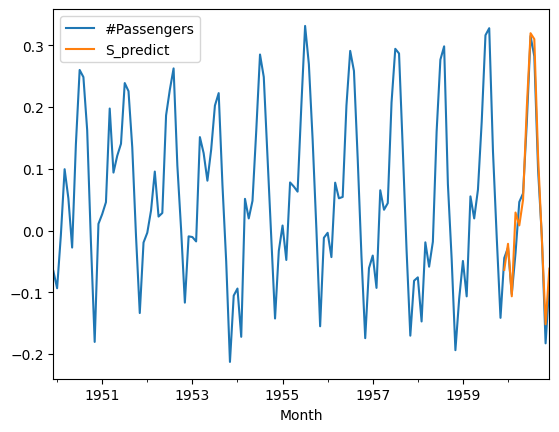

In [ ]:
new_data['S_predict'] = model.predict(start= len(train) ,end=len(train)+len(test)- 1 )
new_data[['#Passengers','S_predict']].plot()

In [ ]:
new_data.tail(30)

,#Passengers,ARIMA_prediction,S_predict
Month,,,
1958-07-01,0.276817,NaN,NaN
1958-08-01,0.298412,NaN,NaN
1958-09-01,0.075268,NaN,NaN
1958-10-01,-0.045657,NaN,NaN
1958-11-01,-0.193762,NaN,NaN
1958-12-01,-0.110499,NaN,NaN
1959-01-01,-0.049241,NaN,NaN
1959-02-01,-0.106598,NaN,NaN
1959-03-01,0.055385,NaN,NaN


<Axes: xlabel='Month'>

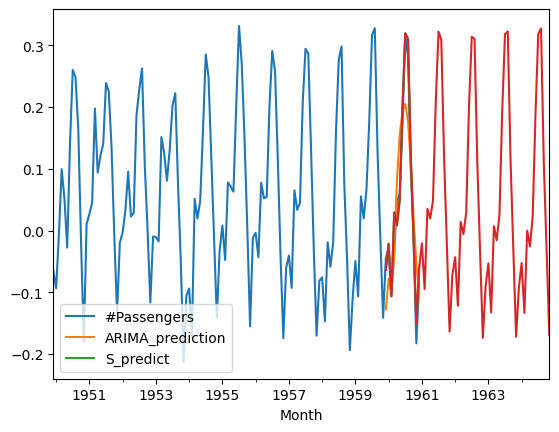

In [ ]:
future=model.forecast(steps=60) # forcast for next 60 months
new_data.plot()
future.plot()
